In [10]:
import pandas as pd #pandas 불러오기

# CSV 파일 읽기
path = "C:/Users/ghom9/Downloads/car_evaluation.csv" # titanic.csv를 저장한 경로를 입력합니다.
df = pd.read_csv(path)

df

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc
...,...,...,...,...,...,...,...
1722,low,low,5more,more,med,med,good
1723,low,low,5more,more,med,high,vgood
1724,low,low,5more,more,big,low,unacc
1725,low,low,5more,more,big,med,good


In [6]:
print(df.isna().sum())

vhigh      0
vhigh.1    0
2          0
2.1        0
small      0
low        0
unacc      0
dtype: int64


In [8]:
df["unacc"].value_counts() #레이블 확인 - 불균형확인, 값의 분포 

unacc
unacc    1209
acc       384
good       69
vgood      65
Name: count, dtype: int64

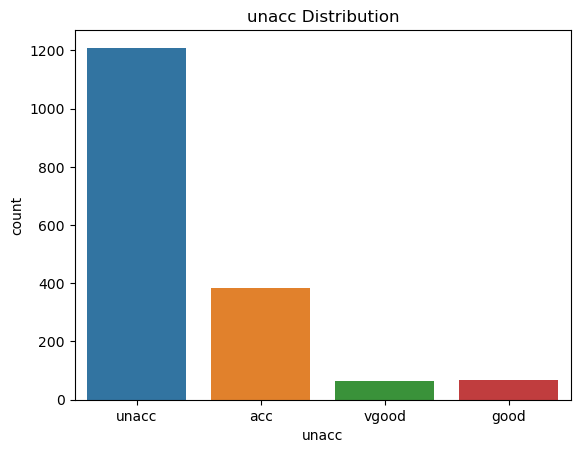

unacc
unacc    0.700058
acc      0.222351
good     0.039954
vgood    0.037638
Name: proportion, dtype: float64


In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='unacc', data=df, hue='unacc') #Survived 컬럼의 데이터 개수를 시각화
plt.title("unacc Distribution") #그래프 제목 설정
plt.show()                         #그래프 출력
print(df['unacc'].value_counts(normalize=True))

In [11]:
columns = ['vhigh', 'vhigh.1', '2', '2.1', 'small', 'low','unacc']

In [13]:
from sklearn.preprocessing import LabelEncoder

label_encoders = {}
for column in columns:
    label_encoders[column] = LabelEncoder()
    df[column] = label_encoders[column].fit_transform(df[column])

In [14]:
df

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,3,3,0,0,2,2,2
1,3,3,0,0,2,0,2
2,3,3,0,0,1,1,2
3,3,3,0,0,1,2,2
4,3,3,0,0,1,0,2
...,...,...,...,...,...,...,...
1722,1,1,3,2,1,2,1
1723,1,1,3,2,1,0,3
1724,1,1,3,2,0,1,2
1725,1,1,3,2,0,2,1


In [18]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

X = df.drop(columns=['unacc'])  # 특징 데이터 (입력값) -> Survived제외한 다른 값들
y = df['unacc']  # 타겟 데이터 (출력값)

# 📌 7. 데이터셋을 학습용(train)과 테스트용(test)으로 분할 (80:20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
# 📌 8. 랜덤 포레스트 모델 생성 및 학습
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# 📌 9. 예측 수행
y_pred = rf_model.predict(X_test)

# 📌 10. 성능 평가 - Accuracy (정확도)
accuracy = accuracy_score(y_test, y_pred)
print(f"📌 Random Forest 정확도 (Accuracy): {accuracy:.4f}")

# 📌 11. Confusion Matrix 출력
conf_matrix = confusion_matrix(y_test, y_pred)
print("\n📌 Confusion Matrix:")
print(conf_matrix)

📌 Random Forest 정확도 (Accuracy): 0.9624

📌 Confusion Matrix:
[[ 72   1   3   1]
 [  2  10   0   3]
 [  1   0 236   0]
 [  2   0   0  15]]


In [20]:
from sklearn.tree import DecisionTreeClassifier

dt_model =  DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# 📌 9. 예측 수행
y_pred = dt_model.predict(X_test)

# 📌 10. 성능 평가 - Accuracy (정확도)
accuracy = accuracy_score(y_test, y_pred)
print(f"📌 DecisionTree 정확도 (Accuracy): {accuracy:.4f}")

# 📌 11. Confusion Matrix 출력
conf_matrix = confusion_matrix(y_test, y_pred)
print("\n📌 Confusion Matrix:")
print(conf_matrix)

📌 DecisionTree 정확도 (Accuracy): 0.9711

📌 Confusion Matrix:
[[ 73   2   0   2]
 [  2  12   0   1]
 [  1   0 236   0]
 [  0   2   0  15]]


In [21]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)

# 📌 9. 예측 수행
y_pred = lr_model.predict(X_test)

# 📌 10. 성능 평가 - Accuracy (정확도)
accuracy = accuracy_score(y_test, y_pred)
print(f"📌 LogisticRegression 정확도 (Accuracy): {accuracy:.4f}")

# 📌 11. Confusion Matrix 출력
conf_matrix = confusion_matrix(y_test, y_pred)
print("\n📌 Confusion Matrix:")
print(conf_matrix)

📌 LogisticRegression 정확도 (Accuracy): 0.6850

📌 Confusion Matrix:
[[ 12   0  64   1]
 [  2   0  13   0]
 [ 13   0 224   0]
 [ 11   0   5   1]]


In [22]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

# 📌 9. 예측 수행
y_pred = knn_model.predict(X_test)

# 📌 10. 성능 평가 - Accuracy (정확도)
accuracy = accuracy_score(y_test, y_pred)
print(f"📌 KNeighbors 정확도 (Accuracy): {accuracy:.4f}")

# 📌 11. Confusion Matrix 출력
conf_matrix = confusion_matrix(y_test, y_pred)
print("\n📌 Confusion Matrix:")
print(conf_matrix)

📌 KNeighbors 정확도 (Accuracy): 0.8757

📌 Confusion Matrix:
[[ 54   1  22   0]
 [ 12   2   1   0]
 [  0   0 237   0]
 [  6   0   1  10]]


In [23]:
from sklearn.svm import SVC

svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)

# 📌 9. 예측 수행
y_pred = svm_model.predict(X_test)

# 📌 10. 성능 평가 - Accuracy (정확도)
accuracy = accuracy_score(y_test, y_pred)
print(f"📌 svm 정확도 (Accuracy): {accuracy:.4f}")

# 📌 11. Confusion Matrix 출력
conf_matrix = confusion_matrix(y_test, y_pred)
print("\n📌 Confusion Matrix:")
print(conf_matrix)

📌 svm 정확도 (Accuracy): 0.7168

📌 Confusion Matrix:
[[ 11   0  66   0]
 [  0   0  15   0]
 [  0   0 237   0]
 [ 10   0   7   0]]
